# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Load the data using sklearn

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()




### Create the train and test datasets

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


### Scale the data with a StandardScaler

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Initialize the values of the model.

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

## Create a sequential model:
- with 2 Dense layers
- use "mean_squared_error" with SGD optimizer and learning rate 1e-3
- Train using 20 epochs


In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 39us/sample - loss: 1.6343 - val_loss: 0.9361
Epoch 2/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.7053 - val_loss: 0.6556
Epoch 3/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.6343 - val_loss: 0.6028
Epoch 4/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5974 - val_loss: 0.5631
Epoch 5/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5701 - val_loss: 0.5375
Epoch 6/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5474 - val_loss: 0.5165
Epoch 7/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5283 - val_loss: 0.5072
Epoch 8/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5130 - val_loss: 0.4806
Epoch 9/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4989 - val_l

## Plot the loss values 

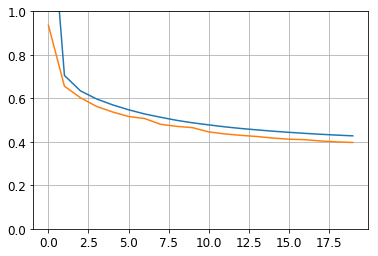

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Make some predictions

In [52]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.3874537],
       [1.6820507],
       [3.0960474]], dtype=float32)